# **Time Series Forecasting**
# Author: Badari Krishna
## Date: 02/27/2024

## Background Information

Time series forecasting is a technique used to predict future values in a sequence of data points collected over time. It essentially involves analyzing historical data to make informed estimates about what might happen in the future.

## Problem Definition

In this Project, I will be making scientific projections based on data with historical time stamps is known as time series forecasting. It entails creating models through historical study, using them to draw conclusions and guide strategic decision-making in the future. 

The fact that the future result is wholly unknown at the time of the task and can only be anticipated through thorough analysis and evidence-based priors is an essential distinction in forecasting. I will be using this data to forecast the possible projections for the price of gold. I will be using multiple algorithms to see which training method works best for this dataset. 

## Importing the Necessary Libraries
1. pandas (pd):

    Purpose: Provides data structures and tools for data manipulation and analysis.Key 
    
    functionalities: Loading data from various sources (CSV, Excel, databases)Creating and manipulating DataFrames (tabular data structures) Performing data cleaning and transformations Exploratory data analysis (EDA) tasks like grouping, sorting, and aggregating data

2. numpy (np):

    Purpose: Offers powerful tools for numerical computations and array manipulation.Key 
    
    functionalities:Creating and working with multi-dimensional arrays Performing mathematical operations on arrays (element-wise and vectorized) Linear algebra functions for matrix operations and solving systems of equations Random number generation and statistical functions

3. matplotlib.pyplot (plt):

    Purpose: Creates various static, animated, and interactive visualizations for data exploration.
    
    Key functionalities: Plotting various chart types (line, scatter, bar, pie charts, etc.) Customization of plot elements like labels, colors, markers, and legends Creating subplots and combined visualizations

4. seaborn (sns):

    Purpose: Builds on top of matplotlib to provide a high-level interface for creating statistical graphics.

    Key functionalities: Creating a variety of statistical plots (distributions, relationships, heatmaps) with a focus on aesthetics and clarity Integration with pandas DataFrames for seamless data visualization Improved plot aesthetics and color schemes for better visual communication

5. statsmodels.tsa.api:

    Purpose: Provides a collection of statistical models and tools specifically designed for time series analysis.
    
    Key functionalities: Implementing various time series forecasting models, including Exponential smoothing (SimpleExpSmoothing, Holt, Holt-Winters) ARIMA (Autoregressive Integrated Moving Average) models SARIMA (Seasonal ARIMA) models Model fitting, evaluation, and diagnostics

6. sklearn.linear_model:

    Purpose: Offers various algorithms for building linear models for prediction and classification tasks.
    
    Key functionalities: Implementing linear regression models to learn the relationship between independent and dependent variables Other linear models like Ridge, Lasso, and ElasticNet for regularization and feature selection

7. warnings:

    Purpose: Provides tools for managing warning messages generated during program execution.

    Key functionalities: Filtering specific warnings based on category or message pattern Ignoring warnings altogether (not recommended unless necessary, as it can mask potential issues)


In [38]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('ignore')

## Importing the DataFrame

The Data Frame has two fields, one being the Date of the given price of gold and the other being the actual price of the gold in dollars.

Below is a summary of the data set:

In [2]:
dataset = pd.read_csv("gold_monthly_csv.csv")
dataset.head()

,Date,Price
0,1950-01,34.73
1,1950-02,34.73
2,1950-03,34.73
3,1950-04,34.73
4,1950-05,34.73


In [3]:
dataset.shape

(847, 2)

In [4]:
print(f"Date range of the gold price data is available from - {dataset.loc[:, 'Date'][0]} to {dataset.loc[:, 'Date'][len(dataset)-1]}")

Date range of the gold price data is available from - 1950-01 to 2020-07


## Cleaning the Data

I have Organised the disorganized data in ascending order so that it will be easier to plot graph of the price and observe the increases in the price over time.

In [5]:
date  = pd.date_range (start= '1/1/1950', end = '8/1/2020', freq='M')
print(date)

DatetimeIndex(['1950-01-31', '1950-02-28', '1950-03-31', '1950-04-30',
               '1950-05-31', '1950-06-30', '1950-07-31', '1950-08-31',
               '1950-09-30', '1950-10-31',
               ...
               '2019-10-31', '2019-11-30', '2019-12-31', '2020-01-31',
               '2020-02-29', '2020-03-31', '2020-04-30', '2020-05-31',
               '2020-06-30', '2020-07-31'],
              dtype='datetime64[ns]', length=847, freq='M')


In [6]:
dataset['month'] = date
dataset.drop('Date', axis = 1, inplace = True)
dataset = dataset.set_index('month')
dataset.head()

,Price
month,
1950-01-31,34.73
1950-02-28,34.73
1950-03-31,34.73
1950-04-30,34.73
1950-05-31,34.73


## Data Exploration

### Gold Prices since 1950

This graph illustrates the increse in Gold prices over the years. We can observe that the prices drastically increased over 2008-2010, and there is another drastic increase after 2018. 

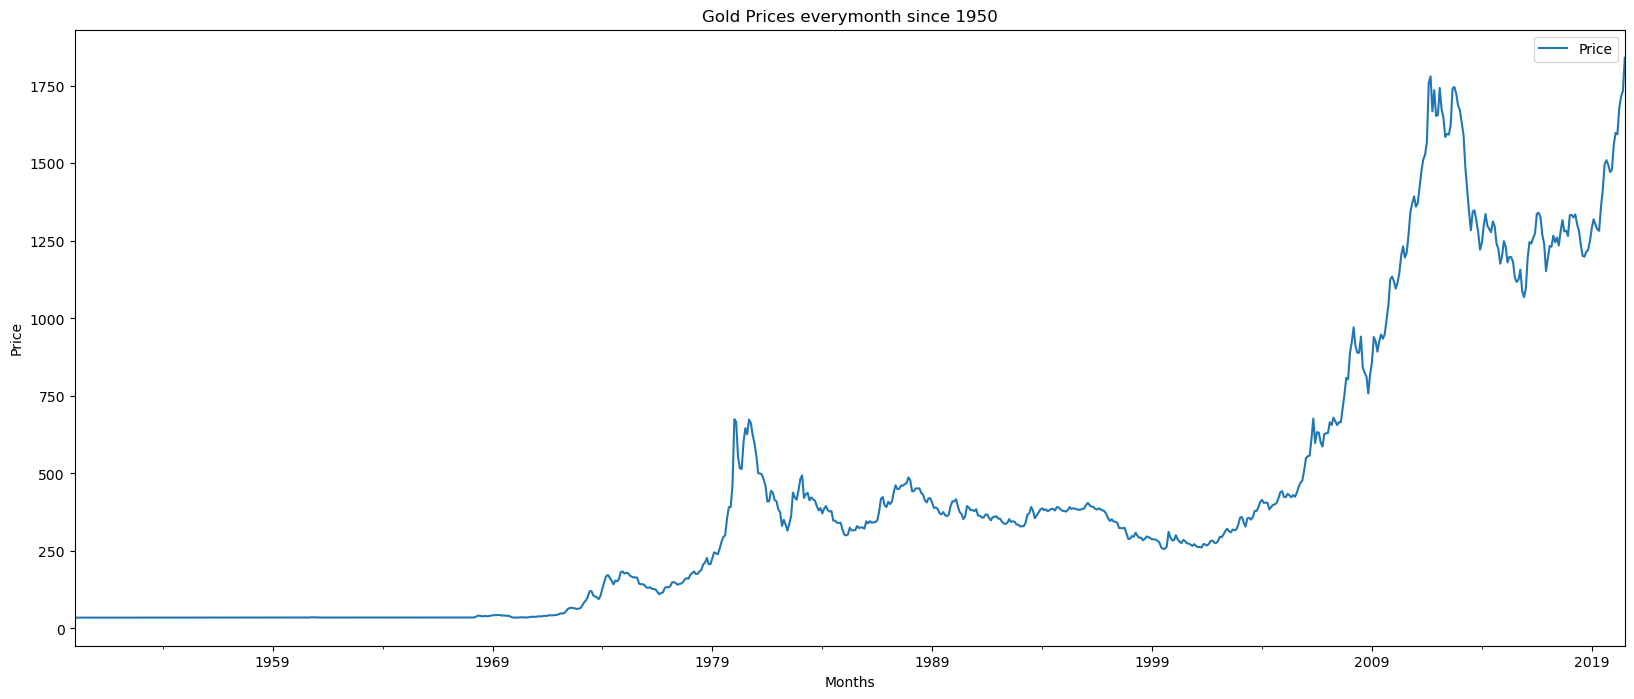

In [7]:
dataset.plot(figsize = (20,8))
plt.title("Gold Prices everymonth since 1950")
plt.xlabel('Months')
plt.ylabel('Price')
plt.show()

### Summary/Description of the Data Frame

In [8]:
round(dataset.describe(), 3)

,Price
count,847.000
mean,416.557
std,453.665
min,34.490
25%,35.190
50%,319.622
75%,447.029
max,1840.807


### Box plot of the change in gold prices

This graph highlights the gradual increase of the price of gold using box plots which helps us visualize the rise and fall of gold more accurately. 

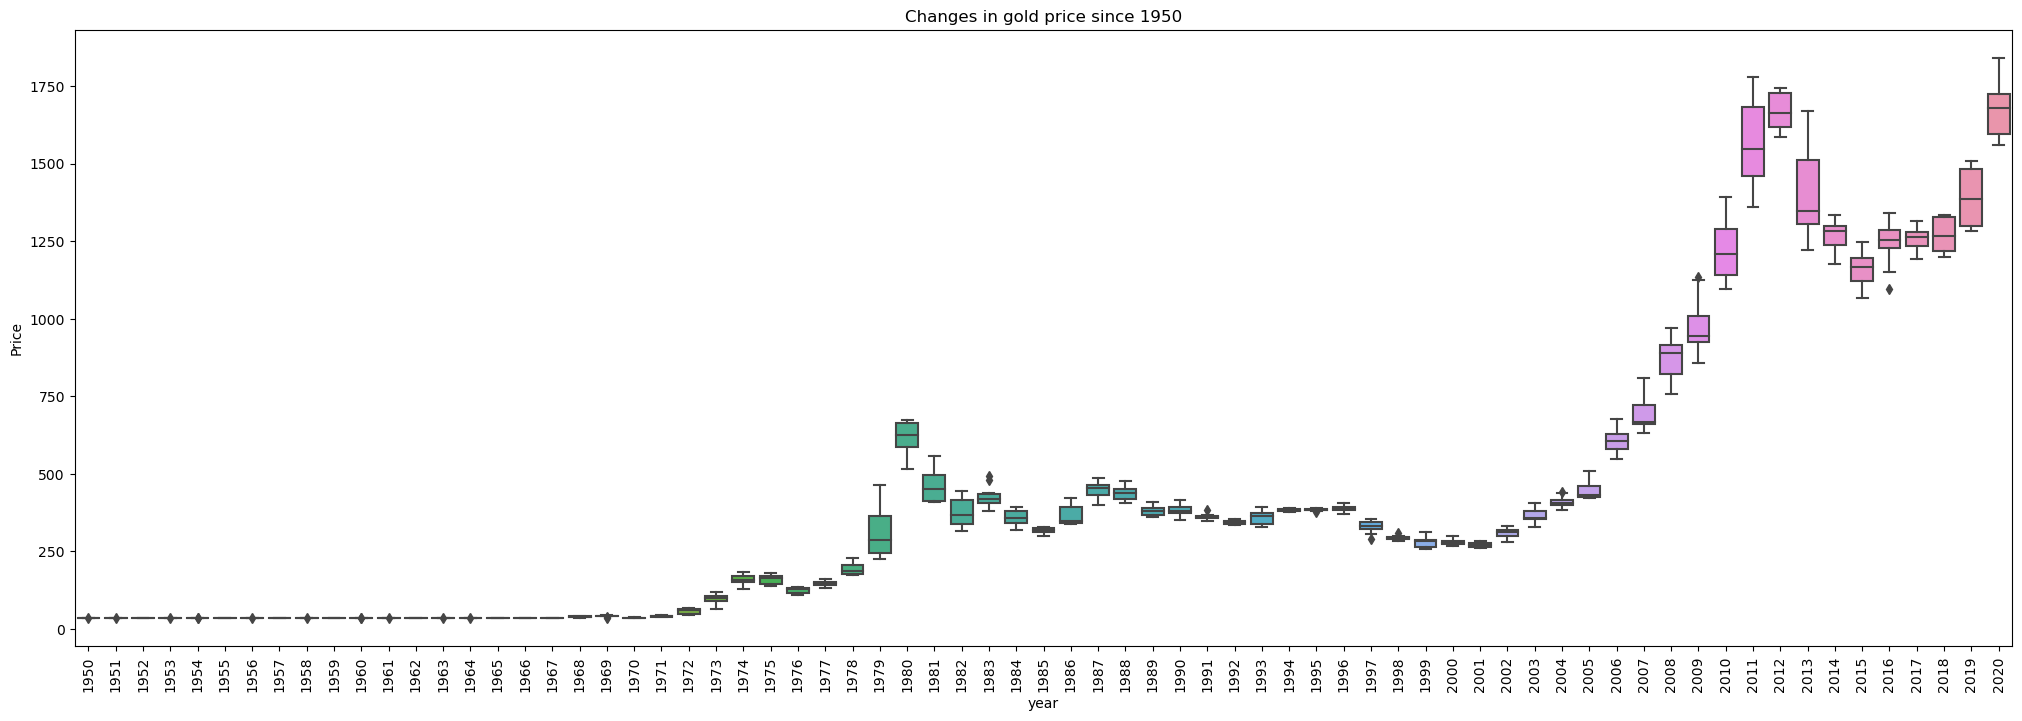

In [9]:
_, ax = plt.subplots(figsize = (25, 8))
sns.boxplot(x = dataset.index.year, y = dataset.values[:, 0], ax=ax)
plt.title('Changes in gold price since 1950')
plt.xlabel('year')
plt.ylabel('Price')
plt.xticks(rotation = 90)
plt.show()

### Monthly Change in Gold Prices over the Years

This Graph shows the change in the price of gold in each month. It compiles the data on the price of gold every month and illustrates how the month may have affected the price of gold. This may explain buying habits over the years that may cause changes in the price of gold. 

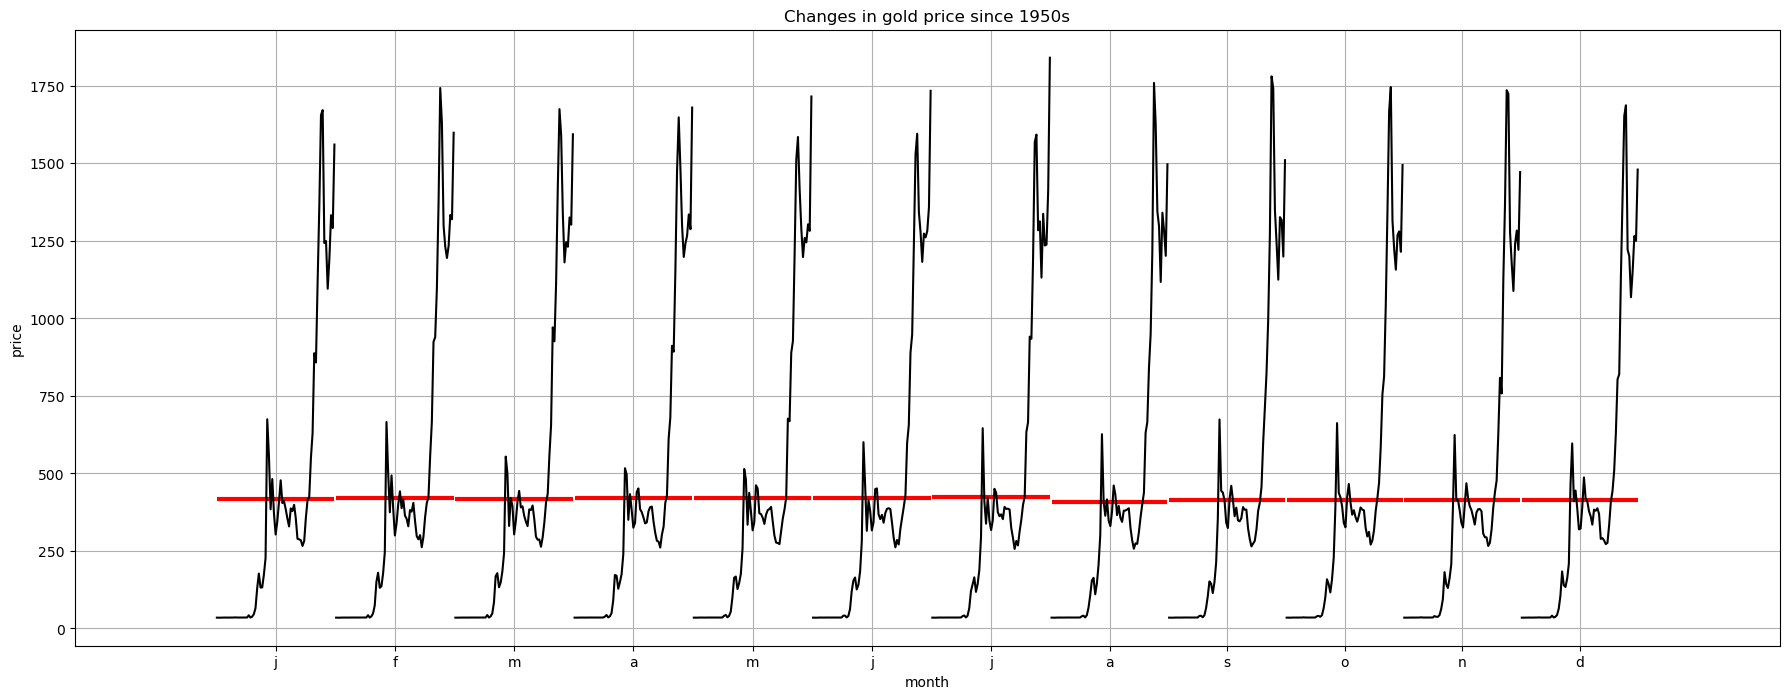

In [10]:
from statsmodels.graphics.tsaplots import month_plot

fig, ax = plt.subplots(figsize=(22, 8))

month_plot(dataset, ylabel='gold price', ax=ax)
plt.title('Changes in gold price since 1950s')
plt.xlabel('month')
plt.ylabel('price')
plt.grid()
plt.show()

### Monthly Change in Gold Prices over the Years(Box Plot)

Similar to the previous graph, I have plotted the Box graph to view the max and minimum for each month.

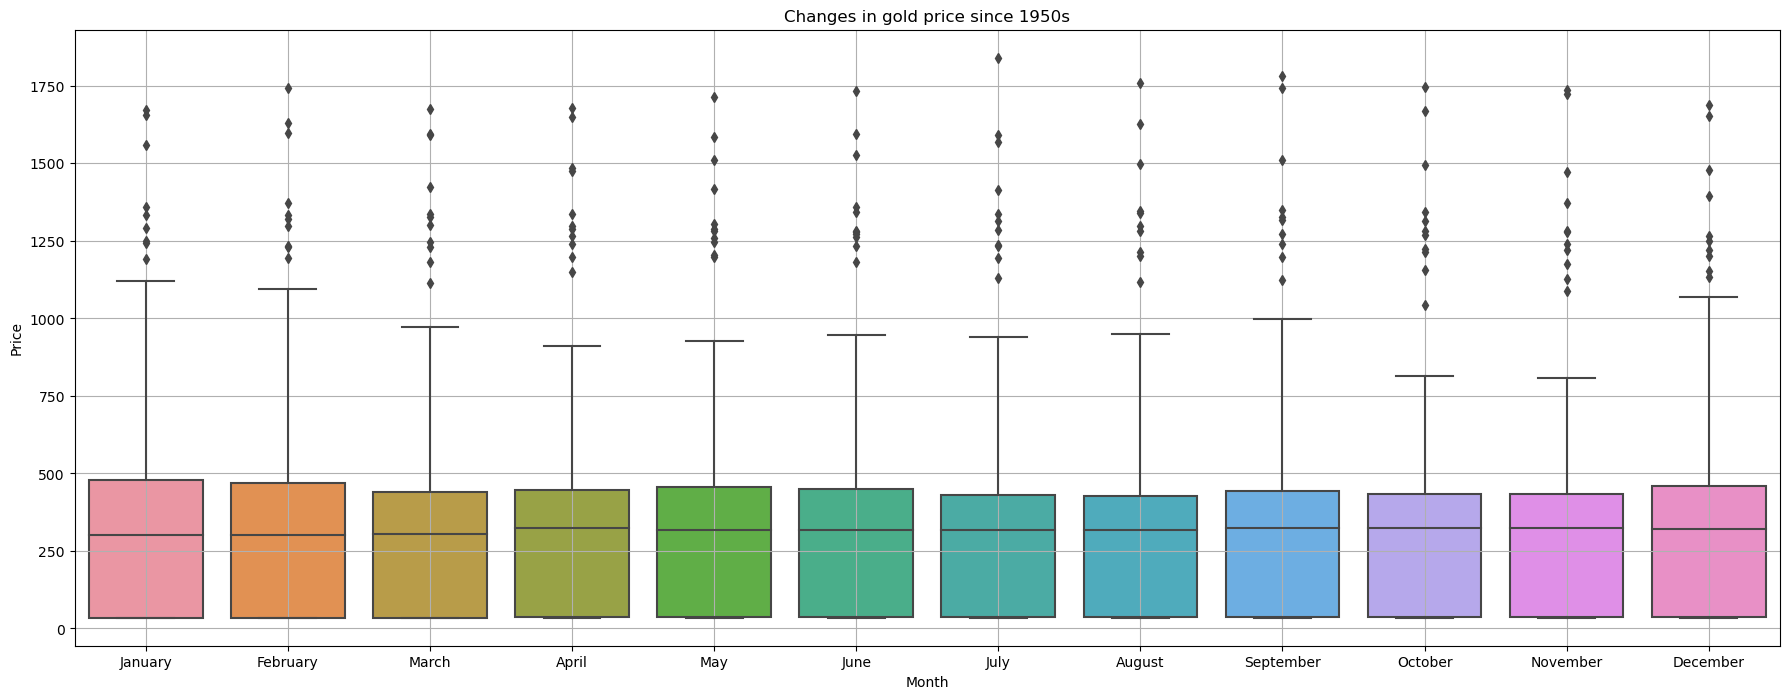

In [11]:
_, ax = plt.subplots(figsize=(22, 8))
sns.boxplot(x = dataset.index.month_name(), y = dataset.values[:, 0], ax = ax)
plt.title('Changes in gold price since 1950s')
plt.xlabel('Month')
plt.ylabel('Price')
plt.grid()
plt.show()

### Average Price of Gold Over the Years

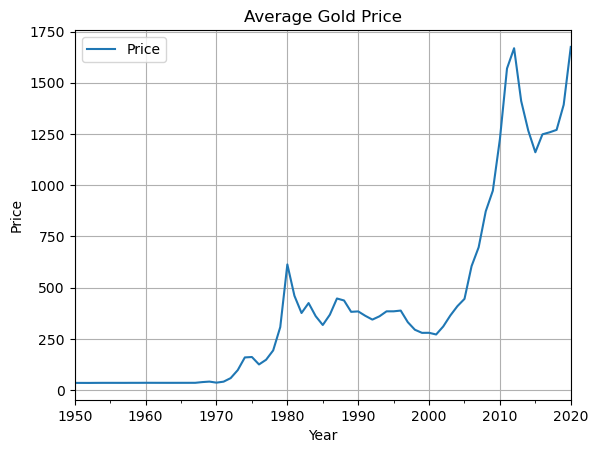

In [12]:
dataset_yearly_sum = dataset.resample('A').mean()
dataset_yearly_sum.plot();
plt.title('Average Gold Price')
plt.xlabel('Year')
plt.ylabel('Price')
plt.grid()
plt.show()

### Average Price of Gold Over the Quater

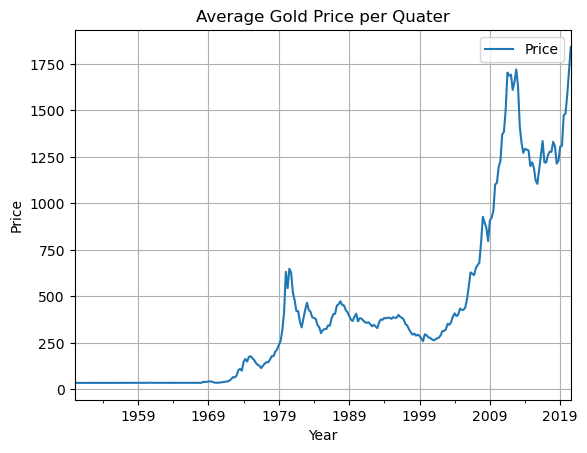

In [13]:
dataset_quater = dataset.resample('Q').mean()
dataset_quater.plot();
plt.title('Average Gold Price per Quater')
plt.xlabel('Year')
plt.ylabel('Price')
plt.grid()
plt.show()

### Average Gold Price over the Decades

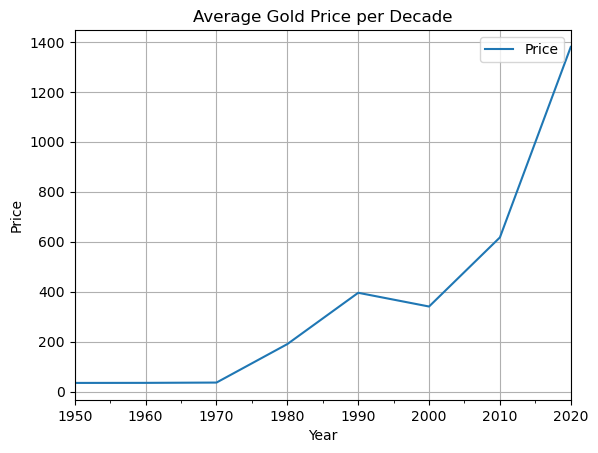

In [14]:
dataset_sumdecade = dataset.resample("10Y").mean()
dataset_sumdecade.plot();
plt.title('Average Gold Price per Decade')
plt.xlabel('Year')
plt.ylabel('Price')
plt.grid()
plt.show()

### Analysing the Co-efficient of Variation of the Price in %

The coefficient of variation (CV), also known as relative standard deviation (RSD), is a statistical measure used in data science to compare the dispersion of data points from different datasets, even if they have different units or scales.

The Coeffeicient has the following application in Data Science:

* Comparing variability across datasets: CV helps compare the spread of data from different sources, even if they measure different quantities. For example, you can use CV to compare the variability of exam scores across different classes or the variability of product prices across different brands.

* Normalizing data for machine learning: When working with machine learning algorithms, it's often beneficial to have features on a similar scale. CV can be used to normalize data by expressing variability as a percentage, making it easier for algorithms to handle features with different units.

* Analyzing financial data: CV is frequently used in finance to assess the risk-return trade-off of investments. A higher CV for an investment could indicate a higher potential return but also a greater risk of loss.


In [15]:
dataset_1 = dataset.groupby(dataset.index.year).mean().rename(columns={'Price':'Mean'})
dataset_1 = dataset_1.merge(dataset.groupby(dataset.index.year).std().rename(columns = {'Price':'Std'}), left_index = True, right_index = True)
dataset_1['Cov_pct'] = (((dataset_1['Std']/dataset_1['Mean'])*100).round(2))

dataset_1.head()

,Mean,Std,Cov_pct
month,,,
1950,34.729167,0.002887,0.01
1951,34.717500,0.020057,0.06
1952,34.628333,0.117538,0.34
1953,34.879167,0.056481,0.16
1954,35.020000,0.082792,0.24


### Co-efficient of variation per year in %

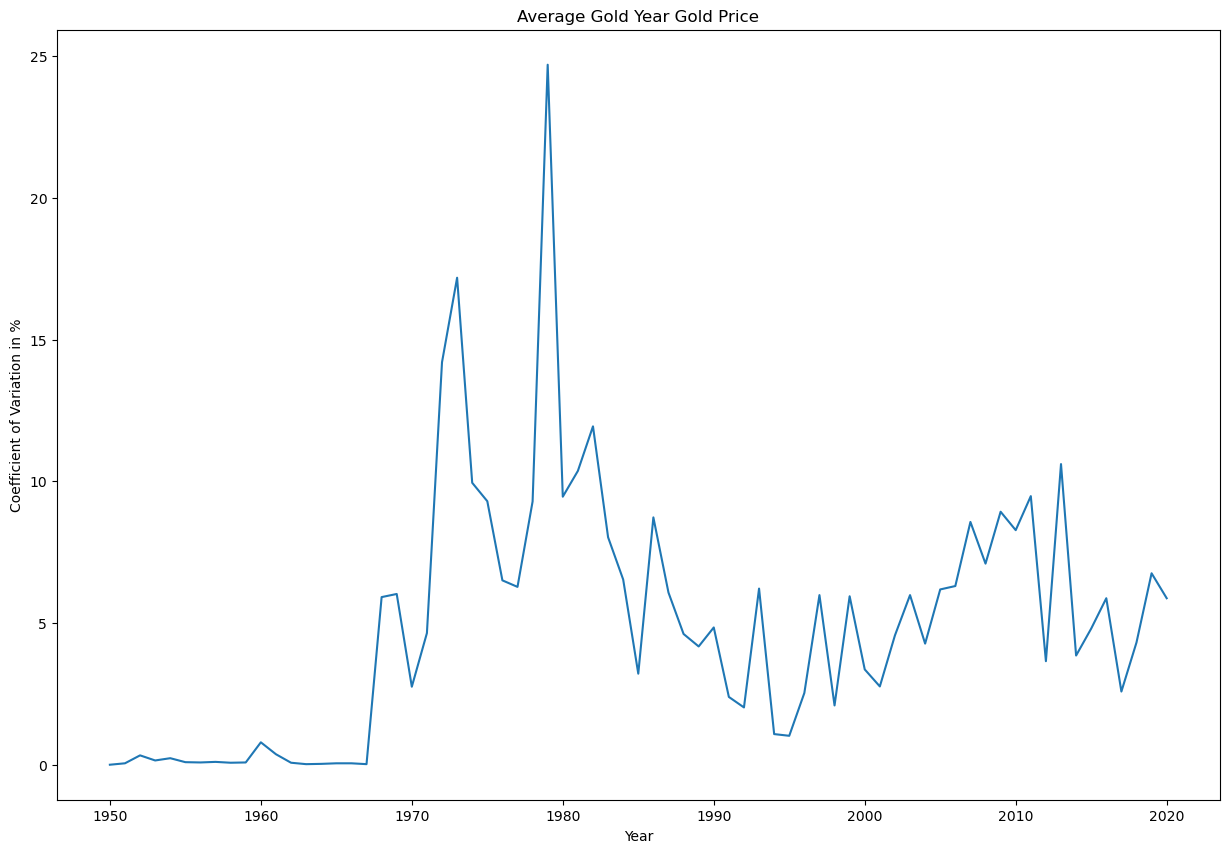

In [16]:
fig, ax = plt.subplots(figsize = (15,10))
dataset_1['Cov_pct'].plot();
plt.title("Average Gold Year Gold Price")
plt.xlabel('Year')
plt.ylabel('Coefficient of Variation in %')
plt.show()

## Data Splitting and Model Construction

The code below splits the dataset (dataset) into two subsets based on the year in the index. The first subset, assigned to train, includes all data points where the year in the index is less than or equal to 2015. This portion is likely used for training a model as it represents historical data. The second subset, assigned to the test, consists of data points where the year in the index is greater than 2015. This portion is likely used for testing the performance of the model on unseen data, simulating real-world scenarios. This process of dividing data into training and testing sets is essential for evaluating the effectiveness of machine learning models.

In [17]:
train = dataset[dataset.index.year <= 2015]
test = dataset[dataset.index.year > 2015]

In [18]:
print(train.shape)
print(test.shape)

(792, 1)
(55, 1)


### This graph highlights the training data that we are taking vs the test data

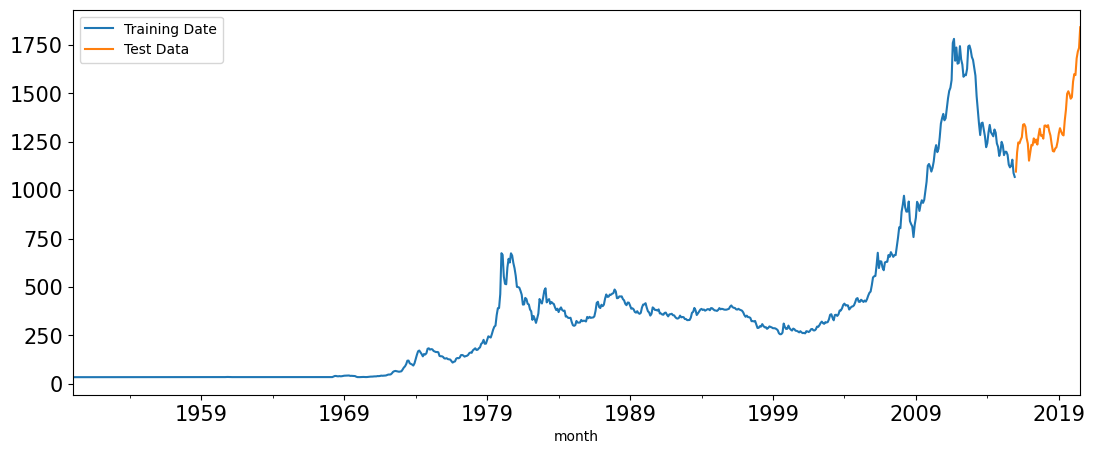

In [19]:
train['Price'].plot(figsize = (13,5), fontsize = 15)
test['Price'].plot(figsize = (13,5), fontsize = 15)
plt.legend(['Training Date', 'Test Data'])
plt.show()

In [20]:
train_time = [i+1 for i in range(len(train))]
test_time = [i + len(train) + 1 for i in range(len(test))]
len(train_time), len(test_time)

(792, 55)

### Applying a Linear Regression Model

Linear regression is a fundamental statistical method used in data science to model the relationship between a dependent variable (what you want to predict) and one or more independent variables (what you are using to predict). It essentially finds the best-fitting straight line that explains the relationship between these variables.

In [21]:
LR_train = train.copy()
LR_test = test.copy()

In [22]:
LR_train['time'] = train_time
LR_test['time'] = test_time

In [23]:
lr = LinearRegression()

In [24]:
lr.fit(LR_train[['time']], LR_train['Price'].values)


LinearRegression()

### Graphing out Linear Regression Model based on the Testing and training Data. 

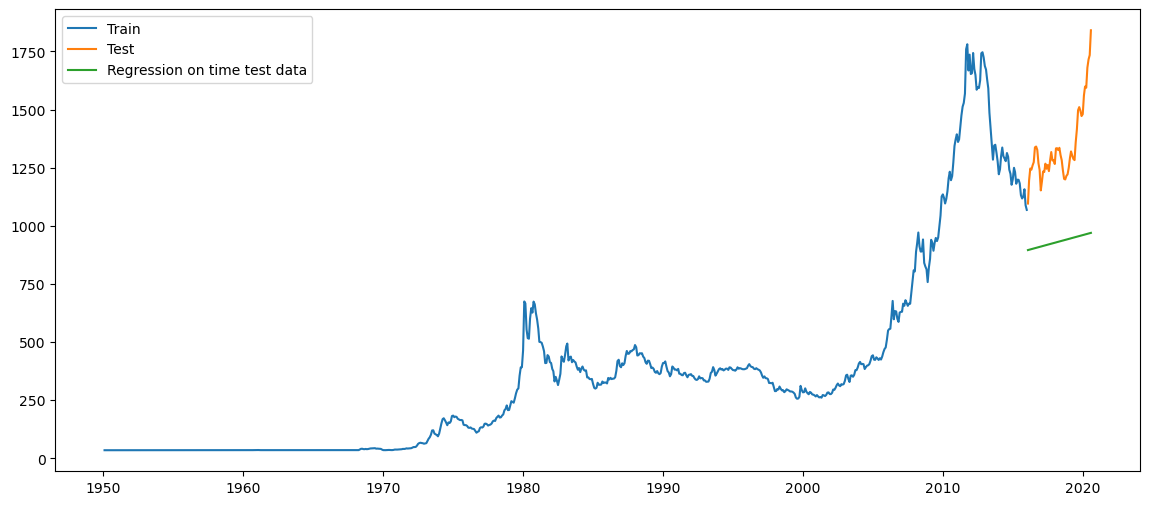

In [25]:
Prediction_Model1_test = lr.predict(LR_test[['time']])
LR_test['forecast'] = Prediction_Model1_test

plt.figure(figsize = (14,6))
plt.plot(train['Price'], label = 'Train')
plt.plot(test['Price'], label = 'Test')
plt.plot(LR_test['forecast'], label = "Regression on time test data")
plt.legend(loc = "best")
plt.show()

### Mean Absolute Percentage Error

MAPE, which stands for Mean Absolute Percentage Error, is a commonly used metric in data science for evaluating the accuracy of forecasting models, particularly in contexts like demand forecasting, sales prediction, and inventory management.

$$
\text{MAPE} = \frac{1}{n} \sum_{i=1}^{n} \left| \frac{\text{Actual}_i - \text{Forecast}_i}{\text{Actual}_i} \right| \cdot 100%
$$

Where:

$n$ is the total number of data points.

$Actual_i$ is the actual value for the i-th data point.

$Forecast_i$ is the predicted value for the i-th data point.


In [26]:
def mape(actual, predicted):
    return round(np.mean(abs(actual - predicted)/actual)*100, 2)

In [27]:
mapetest = mape(test['Price'].values, Prediction_Model1_test)
print('Measure of Prediction of Accuracy of a forecasting method is %3.3f'%(mapetest),'%')

Measure of Prediction of Accuracy of a forecasting method is 29.760 %


In [28]:
results = pd.DataFrame({'Test Mape (%)': [mapetest]}, index = ["Regression On Time"])
results

,Test Mape (%)
Regression On Time,29.76


## Naive Forecasting:

This code snippet implements a naive forecasting technique where the last known data point from the training set is simply assumed to persist and becomes the prediction for all future time steps in the unseen data (Naive_test). While this is a basic approach and may not be very accurate for real-world forecasting tasks, it can serve as a starting point for understanding the concept of making predictions based on historical data.

In [29]:
Naive_train = train.copy()
Naive_test = test.copy()

In [30]:
Naive_test['naive'] = np.asarray(train['Price'])[len(np.asarray(train['Price']))-1]
Naive_test['naive'].head()

month
2016-01-31    1068.317
2016-02-29    1068.317
2016-03-31    1068.317
2016-04-30    1068.317
2016-05-31    1068.317
Name: naive, dtype: float64

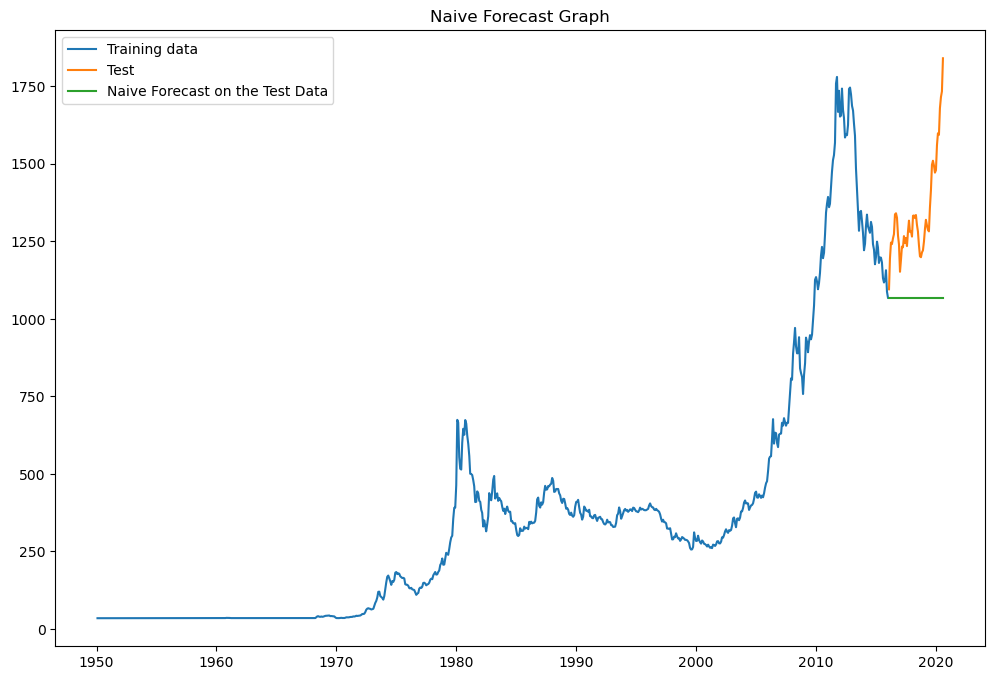

In [31]:
plt.figure(figsize = (12,8))
plt.plot(Naive_train['Price'], label = 'Training data')
plt.plot(test['Price'], label = 'Test')
plt.plot(Naive_test['naive'], label = 'Naive Forecast on the Test Data')
plt.legend(loc ='best')
plt.title('Naive Forecast Graph')
plt.show()

In [32]:
mape_model2 = mape(test['Price'].values, Naive_test['naive'].values)
print('Measure of Prediction of Accuracy of a forecasting method for Naive Test Data is %3.3f'%(mape_model2),'%')

Measure of Prediction of Accuracy of a forecasting method for Naive Test Data is 19.380 %


### Interpretation of MAPE:

* A lower MAPE value signifies a smaller average percentage error, meaning the model's predictions are, on average, closer to the actual values. This indicates better accuracy.

* Conversely, a higher MAPE value implies a larger average percentage error, signifying that the model's predictions are, on average, further away from the actual values. This indicates lower accuracy.

### Final Model

This code snippet creates a final model using exponential smoothing with specific trend and seasonality considerations, and trains it on the provided dataset using the defined smoothing parameters. This model can then be used to generate forecasts for future values in the time series data.

In [33]:
final_model = ExponentialSmoothing(dataset,
                                  trend='additive',
                                  seasonal = 'additive').fit(smoothing_level= 0.4,
                                                            smoothing_trend= 0.3,
                                                            smoothing_seasonal= 0.6)

In [34]:
Mape_final_Model = mape(dataset['Price'].values, final_model.fittedvalues)
print("MAPE:", Mape_final_Model)

MAPE: 17.24


This model gives us the lowest Mape so far, therefore indicating that the model used to predict the gold prices is more accurate model. MAPE of the final model: $17.24\%$

In [35]:
predictions = final_model.forecast(steps = len(test))

This code Block goes beyond just point forecasting by generating confidence intervals around the predictions. This provides additional information about the uncertainty associated with the forecasts, allowing for a more nuanced understanding of the expected future values and potential range of outcomes.

In [36]:
pred_dataset = pd.DataFrame({'Lower_CI':predictions - 1.96 * np.std(final_model.resid, ddof= 1),
                            'prediction': predictions,
                            'upper_CI': predictions + 1.96*np.std(final_model.resid, ddof=1)})
pred_dataset.head()

,Lower_CI,prediction,upper_CI
2020-08-31,1684.720786,1792.871758,1901.022731
2020-09-30,1615.307685,1723.458658,1831.609631
2020-10-31,1538.570508,1646.721481,1754.872454
2020-11-30,1476.762125,1584.913098,1693.064070
2020-12-31,1459.331592,1567.482564,1675.633537


### Graph of the Final Model and its Forecast for the change in Gold Prices

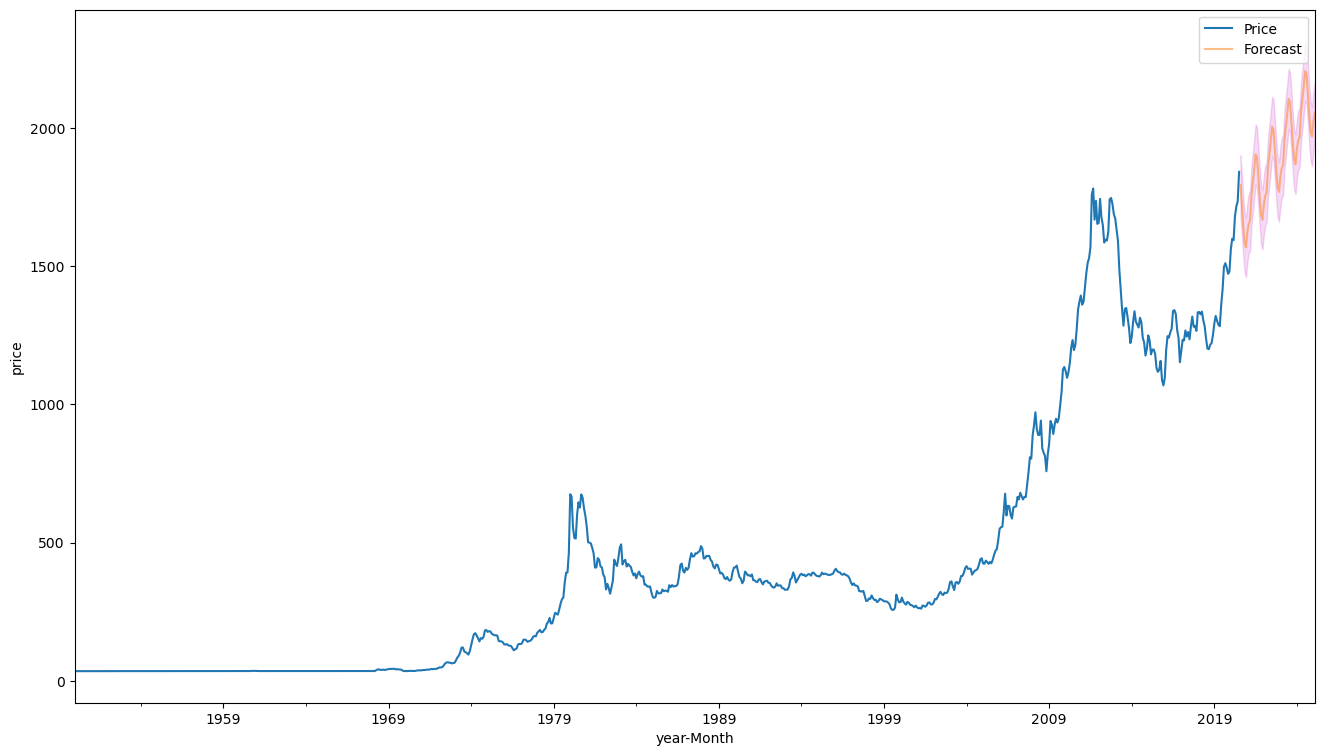

In [37]:
axis = dataset.plot(label = "Actual", figsize=(16,9))
pred_dataset['prediction'].plot(ax= axis, label = 'Forecast', alpha = 0.5)
axis.fill_between(pred_dataset.index, pred_dataset['Lower_CI'], pred_dataset['upper_CI'], color = 'm', alpha = .15)
axis.set_xlabel('year-Month')
axis.set_ylabel('price')
plt.legend(loc = 'best')
plt.show()

## Conclusion

This project explored the application of time series forecasting to predict potential future gold prices. We learned that time series forecasting involves analyzing historical data to create models that can guide future decision-making.

The project employed various algorithms to identify the training method most effective for this specific dataset. Through evaluation of different models, we observed that exponential smoothing yielded the most accurate and reliable forecasts for gold price predictions in this case. We saw that the Exponential smoothing method had a MAPE of 17.24%, which was the lowest/ most accurate model we were able to train for this project.

By analyzing the performance of the exponential smoothing model and its corresponding confidence intervals, we can gain valuable insights into the potential range of future gold prices and the associated uncertainties.

It's important to remember that any forecast, even the most sophisticated, is an estimate and not a definitive guarantee of future outcomes. Nevertheless, the knowledge gained from this project equips you with a data-driven approach to approach future gold price decisions and navigate potential market fluctuations more effectively.